## 01.Importing important libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 02.Read and understand the data

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Leads.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Understanding the numerical attributes
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Lot of categorical value contains Select value which may basically specify that no option was selected

df = df.replace('Select', np.nan)

In [9]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Checking the misssing values from Columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [11]:
missing_value_df

,percent_missing
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [12]:
## Removing all the columns from dataframe which have NULL values more than 40% of records

cols_to_drop = ['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index'
                ,'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Country',
                'What matters most to you in choosing a course','Specialization']
df.drop(cols_to_drop,axis=1,inplace=True)

In [13]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [14]:
# Checking again the misssing values from Columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [15]:
missing_value_df

,percent_missing
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


## 03.Treating Missing Values

In [16]:
## Checking below columns distribution

df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
### Since Unemployed is the mode of the data and is occuring the maximum number of times, we can impute NULL with Unemployed

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [18]:
df['Lead Source'].isnull().sum()

36

In [19]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
blog                    1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [20]:
### Since Google is the mode of the data and is occuring the maximum number of times, we can impute NULL with Google 
# Also replacing 'google' with 'Google'


df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

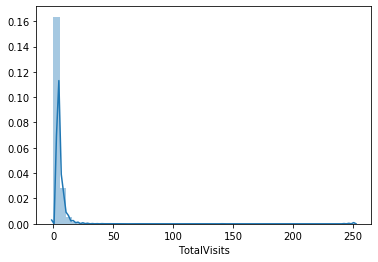

In [21]:
# Checking Displot
sns.distplot(df['TotalVisits'])

In [22]:
# checking missing values

print(df['TotalVisits'].isnull().sum())

# Imputing missing values with mean as this will keep the sample mean to data same

df['TotalVisits'] = df['TotalVisits'].replace(np.nan, df['TotalVisits'].median())

137


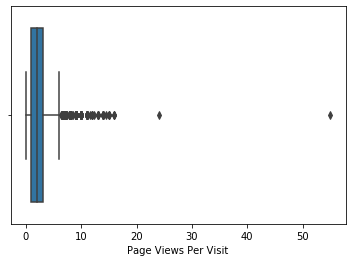

In [23]:
# Checking Boxplot
sns.boxplot(df['Page Views Per Visit'])

In [24]:
# checking missing values

print(df['Page Views Per Visit'].isnull().sum())

# Imputing missing values with mean as this will keep the sample mean to data same

df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())
print(df['Page Views Per Visit'].isnull().sum())

137
0


In [25]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [26]:
### Since Email Opened is the mode of the data and is occuring the maximum number of times, we can impute NULL with Email Opened
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

In [27]:
df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
### replace Unkown in missing values
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [29]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [30]:
### Dropings this column as it looks irrelavenat to our analysis
df.drop('Tags',axis=1,inplace=True)

In [31]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
### Dropings this column as it looks irrelavenat to our analysis
df.drop('City',axis=1,inplace=True)

In [33]:
#  Checing missing values again after imputation

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [34]:
missing_value_df

,percent_missing
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


## 04. Data Visualization

In [139]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


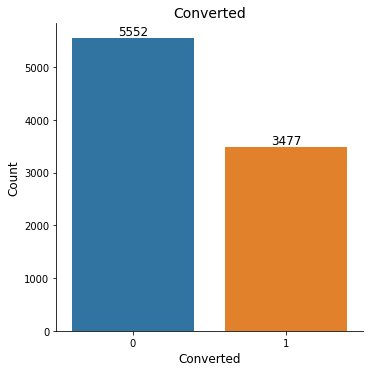

In [141]:
# Conversion Rate 
plot = sns.catplot(x="Converted", kind="count", data=df);
plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')
    
plt.show()

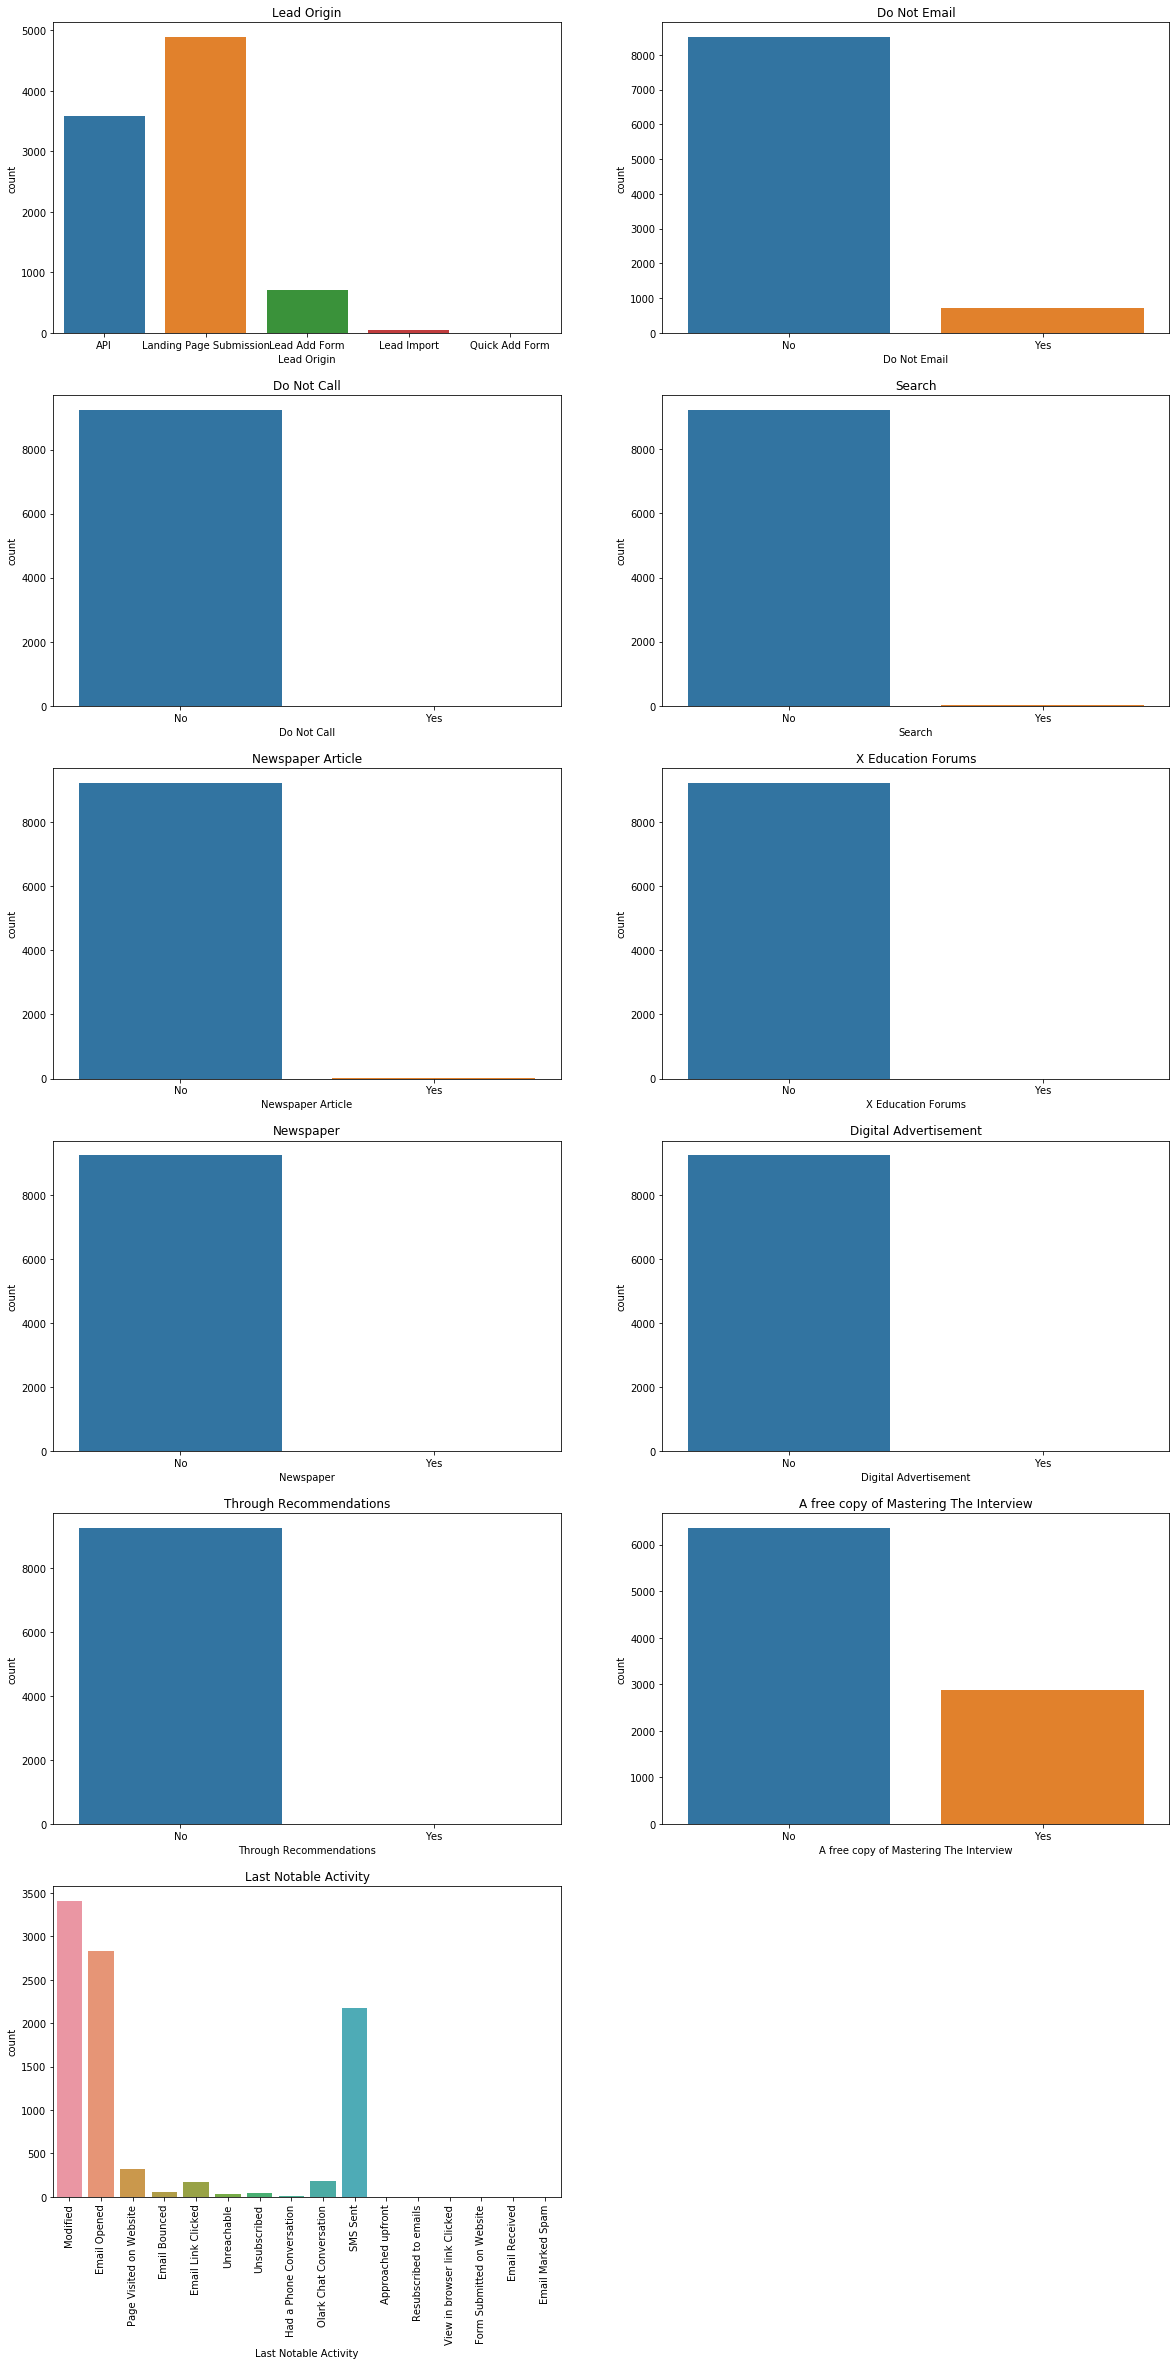

In [35]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

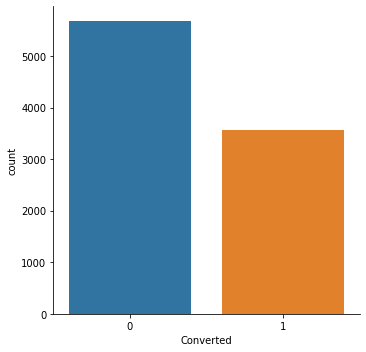

In [36]:
#Plotting coversion rate

sns.catplot(x='Converted',kind='count',data=df)
plt.show()

# Insight/Observation
#1.Conversion rate is currently very low (< 40%)

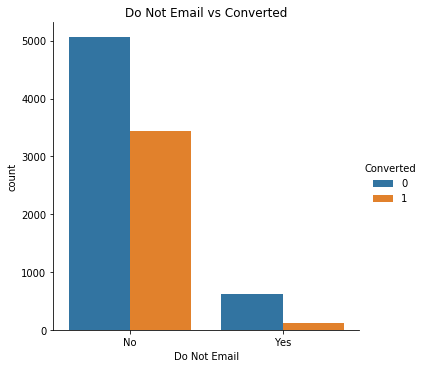

In [37]:
#Plot b/w 'Do not email' vs Converted

sns.catplot(x='Do Not Email',hue='Converted',kind='count',data=df)
plt.title('Do Not Email vs Converted')
plt.show()

# Insight/Observation
#1.Very high number of people are getting converted when to agree to get mail

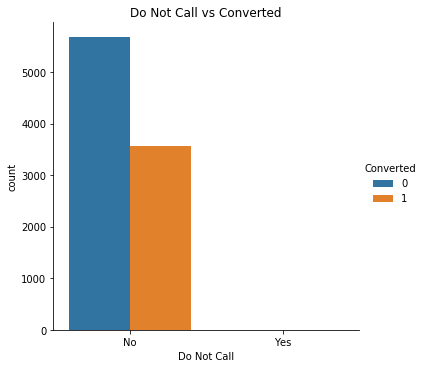

In [38]:
#Plot b/w 'Do not call' vs converted

sns.catplot(x='Do Not Call',hue='Converted',kind='count',data=df)
plt.title('Do Not Call vs Converted')
plt.show()

# Insight/Observation
#1.Maximum number of people are opting to get a call and more than 50% are getting converted

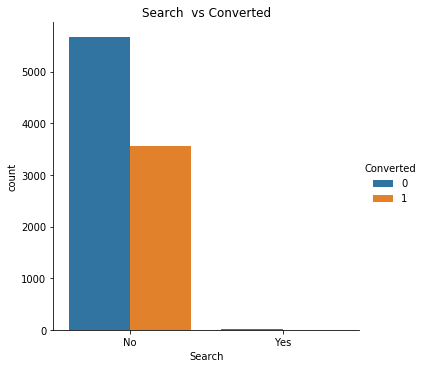

In [39]:
#Plot b/w Search vs converted

sns.catplot(x='Search',hue='Converted',kind='count',data=df)
plt.title('Search  vs Converted')
plt.show()

# Insight/Observation
#1.Leads who are not through normal search are having more conversion rate

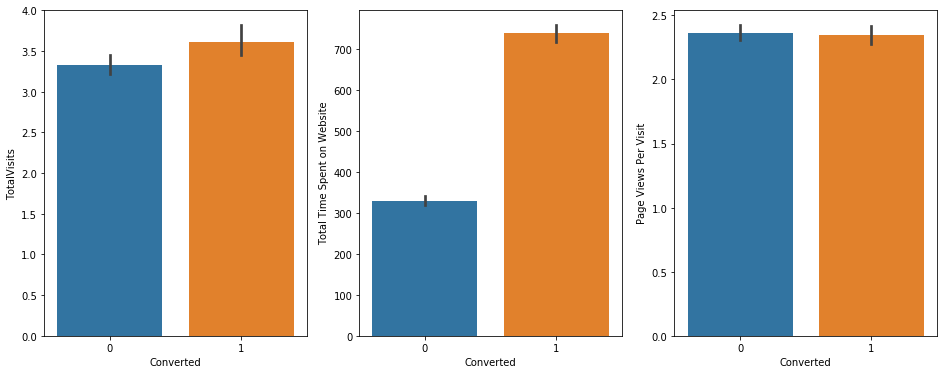

In [40]:
# Checking conversions for remaining numeric values

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = df)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = df)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = df)
plt.show()

# Insight/Observation
#Conversion rate is high for Total Visits, Total Time Spent on Website and it is little low in Page Views Per Visit.

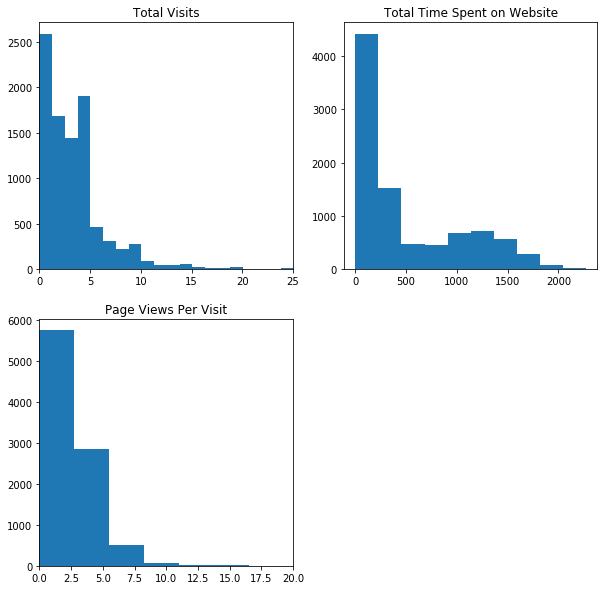

In [41]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

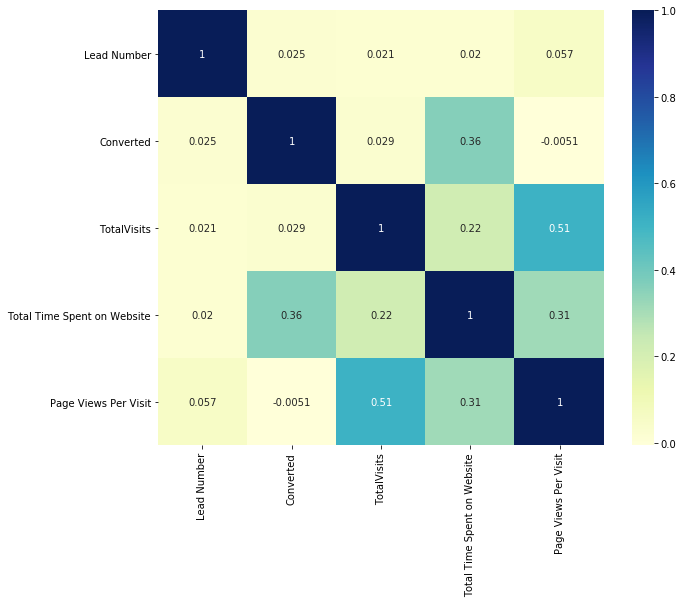

In [42]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [43]:
#Checking the value counts below varibales so that we can understand their distributiom

print(df['Magazine'].value_counts())
print(df['Receive More Updates About Our Courses'].value_counts())
print(df['Update me on Supply Chain Content'].value_counts())
print(df['Get updates on DM Content'].value_counts())
print(df['I agree to pay the amount through cheque'].value_counts())
print(df['Newspaper Article'].value_counts())
print(df['X Education Forums'].value_counts())
print(df['Newspaper'].value_counts())

No    9240
Name: Magazine, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64


In [44]:
#Above columns have only one categorical value for more than 99.9%, So we need to drop these columns

df = df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque','Newspaper Article','X Education Forums','Newspaper'],axis=1)
df.shape

(9240, 17)

## 05.Data Preparation

In [45]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,Modified


In [46]:
# Creating binary flags for categorical variables

varlist =  ['Do Not Email','Do Not Call','Search','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[varlist] = df[varlist].apply(binary_map)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified


In [47]:
# Creating dummies for categorical

df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [48]:
#Creating the dummies for below categorical variables

dummy1 = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']],drop_first=True)
df = pd.concat([df,dummy1],axis=1)
df.shape

(9240, 76)

In [49]:
#Dropping the original columns as we have created the dummies

df = df.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'],axis=1)

In [50]:
#Dropping columns Prospect ID & Lead Number as they are of no use for our analysis

df = df.drop(['Prospect ID','Lead Number'],axis=1)
df.shape

(9240, 69)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Do Not Call                                           9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   Search                                                9240 non-null   int64  
 7   Digital Advertisement                                 9240 non-null   int64  
 8   Through Recommendations                               9240

In [52]:
# Check if we have any categorical column left from our data

categorical_col = df.select_dtypes(exclude =["number"]).columns.values
numerical_col = df.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 [] 


NUMERICAL FEATURES : 
 ['Do Not Email' 'Do Not Call' 'Converted' 'TotalVisits'
 'Total Time Spent on Website' 'Page Views Per Visit' 'Search'
 'Digital Advertisement' 'Through Recommendations'
 'A free copy of Mastering The Interview'
 'Lead Origin_Landing Page Submission' 'Lead Origin_Lead Add Form'
 'Lead Origin_Lead Import' 'Lead Origin_Quick Add Form'
 'Lead Source_Direct Traffic' 'Lead Source_Facebook' 'Lead Source_Google'
 'Lead Source_Live Chat' 'Lead Source_NC_EDM' 'Lead Source_Olark Chat'
 'Lead Source_Organic Search' 'Lead Source_Pay per Click Ads'
 'Lead Source_Press_Release' 'Lead Source_Reference'
 'Lead Source_Referral Sites' 'Lead Source_Social Media'
 'Lead Source_WeLearn' 'Lead Source_Welingak Website' 'Lead Source_bing'
 'Lead Source_blog' 'Lead Source_testone' 'Lead Source_welearnblog_Home'
 'Lead Source_youtubechannel' 'Last Activity_Converted to Lead'
 'Last Activity_Email Bounced' 'Last Activity_Email Link Clicked'
 'Last Activity_Em

In [53]:
#Checking for outliers

df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.50,.75,.90,.95,.99])

# Insight/Observation
#1. We can observe that there are some outliers we should be treated

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


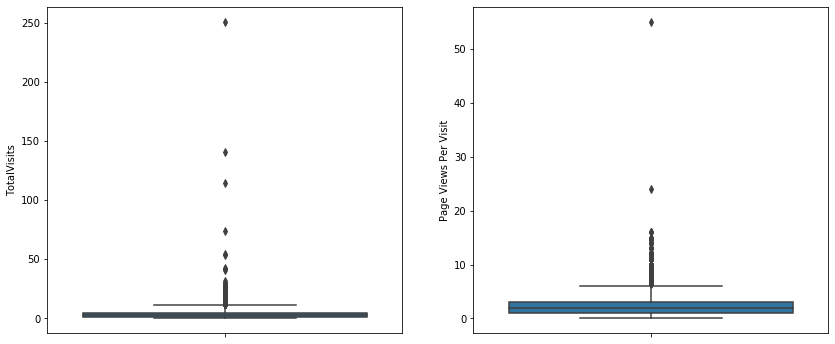

In [54]:
#Plotting the outliers using plots

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='TotalVisits',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Page Views Per Visit',data=df)
plt.show()


In [55]:
#Treating the outliers above 99 percentile
Q1 = df.TotalVisits.quantile(0.99)
Q2 = df['Page Views Per Visit'].quantile(0.99)

df = df[df['TotalVisits']<Q1]
df = df[df['Page Views Per Visit']<Q2]

## 06.Modelling

### 6.1.Train vs Test split

In [56]:
from sklearn.model_selection import train_test_split
X = df.drop(['Converted'],axis=1)
y = df['Converted']

In [57]:
#Splitting the data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3,random_state = 50)

### 6.2.Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3894,0,0,0.1250,0.019806,0.250,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1925,0,0,0.3125,0.381162,0.625,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6175,0,0,0.2500,0.828345,0.500,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9094,1,0,0.1250,0.334067,0.125,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
450,0,0,0.1875,0.081426,0.375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 6.3.Model Building

In [59]:
import statsmodels.api as sm
log_mod1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
log_mod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Jan 2021   Deviance:                          nan
Time:                        12:22:33   Pearson chi2:                 6.46e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 6.432e+14   8.88e+07   7.24e+06      0.000    6.43e+14    6.43e+14
Do Not Email                                         -7.826e+14   4.51e+06  -1.74e+08      0.000   -7.83e+14   -7.83e+14
Do Not Call                                           4.513e+15   4.76e+07   9.49e+07      0.000    4.51e+15    4.51e+15
TotalVisits                                           3.055e+14   7.66e+06   3.99e+07      0.000    3.05e+14    3.05e+14
Total Time Spent on Website                           2.953e+14   3.99e+06   7.41e+07      0.000    2.95e+14    2.95e+14
Page Views Per Visit                                  3.321e+14   6.51e+06    5.1e+07      0.000    3.32e+14    3.32e+14
Search                                               -7.655e+14   2.36e+07  -3.24e+07      0.000   -7.65e+14   -7.65e+14
Digital Advertisement                                 4.206e+15   6.72e+07   6.25e+07      0.000    4.21e+15    4.21e+15
Through Recommendations                               1.515e+15   3.17e+07   4.77e+07      0.000    1.52e+15    1.52e+15
A free copy of Mastering The Interview                1.232e+14   2.68e+06    4.6e+07      0.000    1.23e+14    1.23e+14
Lead Origin_Landing Page Submission                   5.562e+13   2.77e+06   2.01e+07      0.000    5.56e+13    5.56e+13
Lead Origin_Lead Add Form                             1.244e+15   1.32e+07    9.4e+07      0.000    1.24e+15    1.24e+15
Lead Origin_Lead Import                              -1.607e+15   6.72e+07  -2.39e+07      0.000   -1.61e+15   -1.61e+15
Lead Origin_Quick Add Form                            5.589e+15   6.74e+07   8.29e+07      0.000    5.59e+15    5.59e+15
Lead Source_Direct Traffic                            1.198e+15   4.94e+07   2.43e+07      0.000     1.2e+15     1.2e+15
Lead Source_Facebook                                  3.198e+15    8.4e+07   3.81e+07      0.000     3.2e+15     3.2e+15
Lead Source_Google                                    1.219e+15   4.93e+07   2.47e+07      0.000    1.22e+15    1.22e+15
Lead Source_Live Chat                                 3.572e+15   8.23e+07   4.34e+07      0.000    3.57e+15    3.57e+15
Lead Source_NC_EDM                                    5.736e+15   8.33e+07   6.89e+07      0.000    5.74e+15    5.74e+15
Lead Source_Olark Chat                                1.339e+15   4.95e+07   2.71e+07      0.000    1.34e+15    1.34e+15
Lead Source_Organic Search                            1.198e+15   4.94e+07   2.43e+07      0.000     1.2e+15     1.2e+15
Lead Source_Pay per Click Ads                         -2.36e+15   8.33e+07  -2.83e+07      0.000   -2.36e+15   -2.36e+15
Lead Source_Press_Release                              -35

### 6.4.Feature selection using RFE

In [60]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(log_model, 20)            
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 10),
 ('Digital Advertisement', False, 18),
 ('Through Recommendations', False, 25),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', True, 1),
 ('Lead Sour

In [63]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [64]:
## MODEL 2

X_train_sm = sm.add_constant(X_train[col])
log_mod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_mod2 = log_mod2.fit()
log_mod2.summary()

# Insight/Observation
#Remove column 'Lead Source_Social Media' as it is highly in significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.1
Date:                Mon, 11 Jan 2021   Deviance:                       5222.2
Time:                        12:22:36   Pearson chi2:                 6.81e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3854      0.112    -21.301      0.000      -2.605      -2.166
Do Not Email                                            -1.0615      0.186     -5.704      0.000      -1.426      -0.697
TotalVisits                                              1.6447      0.291      5.645      0.000       1.074       2.216
Total Time Spent on Website                              4.6034      0.165     27.858      0.000       4.280       4.927
Page Views Per Visit                                    -1.0483      0.250     -4.199      0.000      -1.538      -0.559
Lead Origin_Lead Add Form                                3.1133      0.495      6.284      0.000       2.142       4.084
Lead Source_Olark Chat                                   1.1606      0.130      8.955      0.000       0.907       1.415
Lead Source_Reference                                    0.7634      0.530      1.440      0.150      -0.276       1.802
Lead Source_Social Media                                25.4834   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             3.3913      1.123      3.019      0.003       1.190       5.593
Last Activity_Converted to Lead                         -0.9684      0.210     -4.607      0.000      -1.380      -0.556
Last Activity_Email Bounced                             -0.7531      0.329     -2.289      0.022      -1.398      -0.108
Last Activity_Had a Phone Conversation                   0.3274      0.904      0.362      0.717      -1.444       2.099
Last Activity_Olark Chat Conversation                   -1.3841      0.157     -8.821      0.000      -1.692      -1.077
What is your current occupation_Housewife               23.2933   2.89e+04      0.001      0.999   -5.66e+04    5.66e+04
What is your current occupation_Working Professional     2.8002      0.195     14.325      0.000       2.417       3.183
Last Notable Activity_Email Link Clicked                -0.5027      0.274     -1.833      0.067      -1.040       0.035
Last Notable Activity_Had a Phone Conversation          23.8956    1.9e+04      0.001      0.999   -3.73e+04    3.73e+04
Last Notable Activity_Page Visited on Website           -0.5442      0.216     -2.520      0.012      -0.967      -0.121
Last Notable Activity_SMS Sent                           1.5703      0.082     19.078      0.000       1.409       1.732
Last Notable Activity_Unreachable                        1.7113      0.568      3.014      0.003       0.599       2.824
========================================================================================================================
"""

In [65]:
col = col.drop('Lead Source_Social Media',1)

In [66]:
## MODEL 3

X_train_sm = sm.add_constant(X_train[col])
log_mod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_mod3 = log_mod3.fit()
log_mod3.summary()

# Insight/Observation
#Remove column 'Last Notable Activity_Had a Phone Conversation' as it is highly in significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.1
Date:                Mon, 11 Jan 2021   Deviance:                       5226.2
Time:                        12:22:36   Pearson chi2:                 6.80e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3824      0.112    -21.284      0.000      -2.602      -2.163
Do Not Email                                            -1.0623      0.186     -5.709      0.000      -1.427      -0.698
TotalVisits                                              1.6368      0.291      5.619      0.000       1.066       2.208
Total Time Spent on Website                              4.6048      0.165     27.869      0.000       4.281       4.929
Page Views Per Visit                                    -1.0492      0.250     -4.203      0.000      -1.539      -0.560
Lead Origin_Lead Add Form                                3.1113      0.495      6.280      0.000       2.140       4.082
Lead Source_Olark Chat                                   1.1539      0.130      8.909      0.000       0.900       1.408
Lead Source_Reference                                    0.7624      0.530      1.438      0.150      -0.277       1.801
Lead Source_Welingak Website                             3.3893      1.123      3.017      0.003       1.188       5.591
Last Activity_Converted to Lead                         -0.9705      0.210     -4.618      0.000      -1.383      -0.559
Last Activity_Email Bounced                             -0.7531      0.329     -2.289      0.022      -1.398      -0.108
Last Activity_Had a Phone Conversation                   0.3271      0.904      0.362      0.717      -1.445       2.099
Last Activity_Olark Chat Conversation                   -1.3641      0.156     -8.746      0.000      -1.670      -1.058
What is your current occupation_Housewife               23.2918   2.89e+04      0.001      0.999   -5.66e+04    5.66e+04
What is your current occupation_Working Professional     2.7988      0.195     14.320      0.000       2.416       3.182
Last Notable Activity_Email Link Clicked                -0.5014      0.274     -1.828      0.068      -1.039       0.036
Last Notable Activity_Had a Phone Conversation          23.8961    1.9e+04      0.001      0.999   -3.73e+04    3.73e+04
Last Notable Activity_Page Visited on Website           -0.5435      0.216     -2.517      0.012      -0.967      -0.120
Last Notable Activity_SMS Sent                           1.5703      0.082     19.077      0.000       1.409       1.732
Last Notable Activity_Unreachable                        1.7113      0.568      3.014      0.003       0.599       2.824
========================================================================================================================
"""

In [67]:
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [68]:
## MODEL 4

X_train_sm = sm.add_constant(X_train[col])
log_mod4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_mod4 = log_mod4.fit()
log_mod4.summary()

# Insight/Observation
#Remove column 'What is your current occupation_Housewife'' as it is highly in significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.8
Date:                Mon, 11 Jan 2021   Deviance:                       5235.5
Time:                        12:22:36   Pearson chi2:                 9.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3836      0.112    -21.312      0.000      -2.603      -2.164
Do Not Email                                            -1.0620      0.186     -5.711      0.000      -1.427      -0.698
TotalVisits                                              1.6379      0.291      5.637      0.000       1.068       2.207
Total Time Spent on Website                              4.5944      0.165     27.842      0.000       4.271       4.918
Page Views Per Visit                                    -1.0369      0.249     -4.166      0.000      -1.525      -0.549
Lead Origin_Lead Add Form                                3.1121      0.495      6.283      0.000       2.141       4.083
Lead Source_Olark Chat                                   1.1554      0.129      8.925      0.000       0.902       1.409
Lead Source_Reference                                    0.7573      0.530      1.429      0.153      -0.282       1.796
Lead Source_Welingak Website                             3.3895      1.123      3.018      0.003       1.188       5.591
Last Activity_Converted to Lead                         -0.9682      0.210     -4.609      0.000      -1.380      -0.556
Last Activity_Email Bounced                             -0.7516      0.329     -2.286      0.022      -1.396      -0.107
Last Activity_Had a Phone Conversation                   2.2946      0.715      3.208      0.001       0.893       3.697
Last Activity_Olark Chat Conversation                   -1.3635      0.156     -8.745      0.000      -1.669      -1.058
What is your current occupation_Housewife               22.2940   1.75e+04      0.001      0.999   -3.43e+04    3.44e+04
What is your current occupation_Working Professional     2.7939      0.195     14.292      0.000       2.411       3.177
Last Notable Activity_Email Link Clicked                -0.5016      0.274     -1.829      0.067      -1.039       0.036
Last Notable Activity_Page Visited on Website           -0.5428      0.216     -2.516      0.012      -0.966      -0.120
Last Notable Activity_SMS Sent                           1.5693      0.082     19.076      0.000       1.408       1.731
Last Notable Activity_Unreachable                        1.7102      0.568      3.013      0.003       0.598       2.823
========================================================================================================================
"""

In [69]:
col = col.drop('What is your current occupation_Housewife',1)

In [70]:
## MODEL 5

X_train_sm = sm.add_constant(X_train[col])
log_mod5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_mod5 = log_mod5.fit()
log_mod5.summary()

# Insight/Observation
#Remove column 'Lead Source_Reference' as it has high p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.2
Date:                Mon, 11 Jan 2021   Deviance:                       5242.3
Time:                        12:22:36   Pearson chi2:                 9.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3781      0.112    -21.283      0.000      -2.597      -2.159
Do Not Email                                            -1.0643      0.186     -5.723      0.000      -1.429      -0.700
TotalVisits                                              1.6303      0.290      5.613      0.000       1.061       2.200
Total Time Spent on Website                              4.6013      0.165     27.893      0.000       4.278       4.925
Page Views Per Visit                                    -1.0381      0.249     -4.173      0.000      -1.526      -0.551
Lead Origin_Lead Add Form                                3.1101      0.495      6.279      0.000       2.139       4.081
Lead Source_Olark Chat                                   1.1519      0.129      8.903      0.000       0.898       1.405
Lead Source_Reference                                    0.7654      0.530      1.444      0.149      -0.273       1.804
Lead Source_Welingak Website                             3.3880      1.123      3.016      0.003       1.187       5.589
Last Activity_Converted to Lead                         -0.9745      0.210     -4.639      0.000      -1.386      -0.563
Last Activity_Email Bounced                             -0.7553      0.329     -2.297      0.022      -1.400      -0.111
Last Activity_Had a Phone Conversation                   2.2910      0.715      3.202      0.001       0.889       3.693
Last Activity_Olark Chat Conversation                   -1.3668      0.156     -8.766      0.000      -1.672      -1.061
What is your current occupation_Working Professional     2.7913      0.196     14.276      0.000       2.408       3.175
Last Notable Activity_Email Link Clicked                -0.5057      0.274     -1.843      0.065      -1.043       0.032
Last Notable Activity_Page Visited on Website           -0.5468      0.216     -2.533      0.011      -0.970      -0.124
Last Notable Activity_SMS Sent                           1.5651      0.082     19.030      0.000       1.404       1.726
Last Notable Activity_Unreachable                        1.7061      0.568      3.005      0.003       0.593       2.819
========================================================================================================================
"""

In [71]:
col = col.drop('Lead Source_Reference',1)

In [72]:
## MODEL 6

X_train_sm = sm.add_constant(X_train[col])
log_mod6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_mod6 = log_mod6.fit()
log_mod6.summary()

# Insight/Observation
# This Model looks stable & have statistically significant p-values

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.1
Date:                Mon, 11 Jan 2021   Deviance:                       5244.3
Time:                        12:22:36   Pearson chi2:                 9.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3729      0.112    -21.251      0.000      -2.592      -2.154
Do Not Email                                            -1.0897      0.186     -5.849      0.000      -1.455      -0.725
TotalVisits                                              1.6236      0.290      5.590      0.000       1.054       2.193
Total Time Spent on Website                              4.6006      0.165     27.886      0.000       4.277       4.924
Page Views Per Visit                                    -1.0411      0.249     -4.185      0.000      -1.529      -0.553
Lead Origin_Lead Add Form                                3.7709      0.214     17.653      0.000       3.352       4.190
Lead Source_Olark Chat                                   1.1478      0.129      8.871      0.000       0.894       1.401
Lead Source_Welingak Website                             2.7280      1.031      2.647      0.008       0.708       4.748
Last Activity_Converted to Lead                         -0.9784      0.210     -4.657      0.000      -1.390      -0.567
Last Activity_Email Bounced                             -0.7702      0.332     -2.322      0.020      -1.420      -0.120
Last Activity_Had a Phone Conversation                   2.2909      0.715      3.203      0.001       0.889       3.693
Last Activity_Olark Chat Conversation                   -1.3672      0.156     -8.770      0.000      -1.673      -1.062
What is your current occupation_Working Professional     2.7958      0.195     14.304      0.000       2.413       3.179
Last Notable Activity_Email Link Clicked                -0.4991      0.273     -1.826      0.068      -1.035       0.037
Last Notable Activity_Page Visited on Website           -0.5449      0.216     -2.526      0.012      -0.968      -0.122
Last Notable Activity_SMS Sent                           1.5627      0.082     19.004      0.000       1.402       1.724
Last Notable Activity_Unreachable                        1.7077      0.567      3.009      0.003       0.596       2.820
========================================================================================================================
"""

### We should now check the VIFs of these variable

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe containing the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Insight/Observation
# Dropping Page Views Per Visit for high vif

,Features,VIF
3,Page Views Per Visit,5.12
1,TotalVisits,5.02
2,Total Time Spent on Website,2.06
0,Do Not Email,1.83
8,Last Activity_Email Bounced,1.77
5,Lead Source_Olark Chat,1.47
10,Last Activity_Olark Chat Conversation,1.43
14,Last Notable Activity_SMS Sent,1.42
4,Lead Origin_Lead Add Form,1.39
6,Lead Source_Welingak Website,1.25


In [74]:
col = col.drop('Page Views Per Visit',1)

In [75]:
## MODEL 7

X_train_sm = sm.add_constant(X_train[col])
log_mod7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_mod7 = log_mod7.fit()
log_mod7.summary()

# Insight/Observation
# This Model looks stable & have statistically significant p-values

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.0
Date:                Mon, 11 Jan 2021   Deviance:                       5262.0
Time:                        12:22:36   Pearson chi2:                 9.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6010      0.099    -26.323      0.000      -2.795      -2.407
Do Not Email                                            -1.1068      0.186     -5.960      0.000      -1.471      -0.743
TotalVisits                                              1.0052      0.250      4.025      0.000       0.516       1.495
Total Time Spent on Website                              4.5843      0.165     27.831      0.000       4.261       4.907
Lead Origin_Lead Add Form                                3.9825      0.208     19.127      0.000       3.574       4.391
Lead Source_Olark Chat                                   1.3645      0.120     11.409      0.000       1.130       1.599
Lead Source_Welingak Website                             2.7342      1.031      2.653      0.008       0.714       4.754
Last Activity_Converted to Lead                         -0.9047      0.210     -4.314      0.000      -1.316      -0.494
Last Activity_Email Bounced                             -0.7308      0.332     -2.201      0.028      -1.382      -0.080
Last Activity_Had a Phone Conversation                   2.2689      0.705      3.218      0.001       0.887       3.651
Last Activity_Olark Chat Conversation                   -1.3355      0.156     -8.587      0.000      -1.640      -1.031
What is your current occupation_Working Professional     2.7924      0.195     14.297      0.000       2.410       3.175
Last Notable Activity_Email Link Clicked                -0.4823      0.272     -1.771      0.076      -1.016       0.051
Last Notable Activity_Page Visited on Website           -0.4066      0.212     -1.922      0.055      -0.821       0.008
Last Notable Activity_SMS Sent                           1.5431      0.082     18.849      0.000       1.383       1.704
Last Notable Activity_Unreachable                        1.7098      0.573      2.986      0.003       0.588       2.832
========================================================================================================================
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Insight/Observation
# All variables have vif less than 5 and model is also significant

,Features,VIF
1,TotalVisits,2.05
2,Total Time Spent on Website,1.97
0,Do Not Email,1.81
7,Last Activity_Email Bounced,1.77
4,Lead Source_Olark Chat,1.46
9,Last Activity_Olark Chat Conversation,1.43
3,Lead Origin_Lead Add Form,1.39
13,Last Notable Activity_SMS Sent,1.39
5,Lead Source_Welingak Website,1.25
10,What is your current occupation_Working Profes...,1.19


In [77]:
##Get the predicted values on our training dataset

y_train_pred = log_mod7.predict(X_train_sm)
y_train_pred[:10]

3894    0.084359
1925    0.731774
6175    0.952159
9094    0.375769
450     0.050023
3890    0.070965
5754    0.498875
6732    0.225046
2810    0.184510
986     0.225046
dtype: float64

In [78]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08435935, 0.73177421, 0.95215932, 0.37576916, 0.05002274,
       0.07096469, 0.49887528, 0.22504622, 0.18451017, 0.22504622])

In [79]:
#Binding a dataframe with actual Converted & Predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.084359,3894
1,1,0.731774,1925
2,1,0.952159,6175
3,1,0.375769,9094
4,0,0.050023,450


In [80]:
## Considering the converted as probability above 0.5 (This is taken arbitarily and should ne changed based on evaluation metrics)

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x : 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,0.084359,3894,0
1,1,0.731774,1925,1
2,1,0.952159,6175,1
3,1,0.375769,9094,0
4,0,0.050023,450,0


In [81]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3425  463]
 [ 717 1715]]


In [82]:
#Checking accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.8132911392405063


#### Accuracy can often be misleading. Let's check some other metrices such as Sensitivity, Specificity, False Positive Rate, Positive Predictive Value, Negative Predictive Value.

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
#Sensitivity
TP / float(TP+FN)

0.7051809210526315

In [85]:
#Specificity
TN / float(TN+FP)

0.8809156378600823

In [86]:
#False positive rate
FP / float(TN+FP)

0.1190843621399177

In [87]:
#Positive predictive value
TP / float(TP+FP)

0.7874196510560147

In [88]:
#Negative predictive value
TN / float(TN+FN)

0.8268952197006277

### Plotting the ROC curve
    The more this curve is towards the upper-left corner, the more is the area under the curve (AUC) and the better is your model. And when the curve is more towards the 45-degree diagonal, the worse is your model.

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

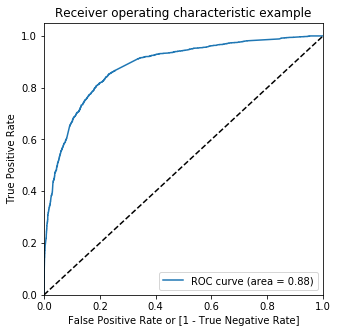

In [91]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding optimal cutoff point

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.084359,3894,0,1,0,0,0,0,0,0,0,0,0
1,1,0.731774,1925,1,1,1,1,1,1,1,1,1,0,0
2,1,0.952159,6175,1,1,1,1,1,1,1,1,1,1,1
3,1,0.375769,9094,0,1,1,1,1,0,0,0,0,0,0
4,0,0.050023,450,0,1,0,0,0,0,0,0,0,0,0


In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384810  1.000000  0.000000
0.1   0.1  0.595411  0.967105  0.362912
0.2   0.2  0.750000  0.916530  0.645833
0.3   0.3  0.800949  0.843339  0.774434
0.4   0.4  0.811392  0.775905  0.833591
0.5   0.5  0.813291  0.705181  0.880916
0.6   0.6  0.795886  0.585938  0.927212
0.7   0.7  0.782120  0.514803  0.949331
0.8   0.8  0.749209  0.395559  0.970422
0.9   0.9  0.716139  0.281661  0.987912


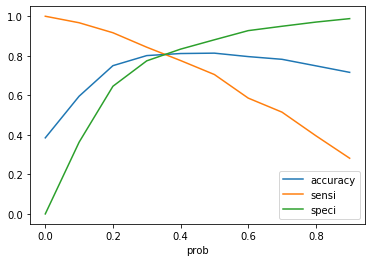

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# Insight / Observation
# We can see that, 0.35 is the optimum point and we should take it as cutoff probability.

In [95]:
#Making the final prediction on 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.084359,3894,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.731774,1925,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.952159,6175,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.375769,9094,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.050023,450,0,1,0,0,0,0,0,0,0,0,0,0


In [96]:
# Calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.084359,3894,0,1,0,0,0,0,0,0,0,0,0,0,8
1,1,0.731774,1925,1,1,1,1,1,1,1,1,1,0,0,1,73
2,1,0.952159,6175,1,1,1,1,1,1,1,1,1,1,1,1,95
3,1,0.375769,9094,0,1,1,1,1,0,0,0,0,0,0,1,38
4,0,0.050023,450,0,1,0,0,0,0,0,0,0,0,0,0,5
5,0,0.070965,3890,0,1,0,0,0,0,0,0,0,0,0,0,7
6,0,0.498875,5754,0,1,1,1,1,1,0,0,0,0,0,1,50
7,0,0.225046,6732,0,1,1,1,0,0,0,0,0,0,0,0,23
8,0,0.184510,2810,0,1,1,0,0,0,0,0,0,0,0,0,18
9,0,0.225046,986,0,1,1,1,0,0,0,0,0,0,0,0,23


In [97]:
#Lets check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8079113924050633

In [98]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3129,  759],
       [ 455, 1977]], dtype=int64)

In [99]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [100]:
#Sensitivity
TP / float(TP+FN)

0.8129111842105263

In [101]:
#Specificity
TN / float(TN+FP)

0.8047839506172839

In [102]:
#False positive rate
FP / float(TN+FP)

0.19521604938271606

In [103]:
#Positive predictive value
TP / float(TP+FP)

0.7225877192982456

In [104]:
#Negative predictive value
TN / float(TN+FN)

0.873046875

## Precision and Recall

In [105]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3425,  463],
       [ 717, 1715]], dtype=int64)

### Precision

TP / TP + FP

In [106]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7874196510560147

### Recall

TP / TP + FN

In [107]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7051809210526315

In [108]:
### Precision and recall tradeoff

In [109]:
from sklearn.metrics import precision_recall_curve

In [110]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      1
 13      1
 14      1
 15      0
 16      1
 17      0
 18      0
 19      0
 20      1
 21      0
 22      1
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      0
 36      1
 37      0
 38      1
 39      1
 40      1
 41      1
 42      1
 43      0
 44      1
 45      1
 46      1
 47      1
 48      1
 49      0
 50      1
 51      0
 52      0
 53      1
 54      0
 55      1
 56      1
 57      0
 58      0
 59      0
 60      0
 61      0
 62      0
 63      0
 64      0
 65      1
 66      1
 67      0
 68      0
 69      0
 70      0
 71      0
 72      0
 73      0
 74      0
 75      0
 76      1
 77      1
 78      0
 79      1
 80      0
 81      1
 82      0
 83      1
 84      0
 85      0
 86      1
 87      0
 88      0
 89      0
 90      1

In [111]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

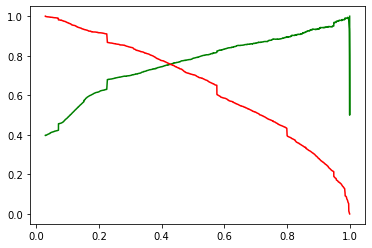

In [112]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predicition on the test set

In [113]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [114]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3580,0,0.0625,0.111407,0,0,0,1,0,0,0,0,0,0,0,0
379,0,0.0625,0.094984,0,0,0,1,0,0,0,0,0,0,0,0
3525,1,0.0625,0.486019,0,0,0,0,1,0,0,0,0,0,0,0
1432,0,0.6875,0.467821,0,0,0,0,0,0,0,0,0,0,0,0
4889,1,0.4375,0.094097,0,0,0,0,0,0,0,0,0,1,0,0


In [115]:
X_test_sm = sm.add_constant(X_test)

In [116]:
y_test_pred = log_mod7.predict(X_test_sm)

In [117]:
y_test_pred[:10]

3580    0.050586
379     0.047090
3525    0.104544
1432    0.558420
4889    0.037570
3701    0.105699
1217    0.116117
7648    0.203827
6721    0.096168
2227    0.280370
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's see the head
y_pred_1.head()

,0
3580,0.050586
379,0.047090
3525,0.104544
1432,0.558420
4889,0.037570


In [120]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [121]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [122]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [124]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3580,0.050586
1,1,379,0.047090
2,0,3525,0.104544
3,1,1432,0.558420
4,0,4889,0.037570


In [125]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [126]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,0,3580,0.050586
1,1,379,0.047090
2,0,3525,0.104544
3,1,1432,0.558420
4,0,4889,0.037570


In [127]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [128]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,0,3580,0.050586,0
1,1,379,0.047090,0
2,0,3525,0.104544,0
3,1,1432,0.558420,1
4,0,4889,0.037570,0


In [129]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,LeadID,Converted_Prob,final_predicted,lead_score
0,0,3580,0.050586,0,5
1,1,379,0.047090,0,5
2,0,3525,0.104544,0,10
3,1,1432,0.558420,1,56
4,0,4889,0.037570,0,4
5,0,3701,0.105699,0,11
6,0,1217,0.116117,0,12
7,0,7648,0.203827,0,20
8,0,6721,0.096168,0,10
9,1,2227,0.280370,0,28


In [130]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    841
0    204
Name: final_predicted, dtype: int64

In [131]:
# check the precentage of final_predicted conversions on test data

842/float(842+203)

# Insight/Observation
#1.We observe that the final prediction of conversions have a target rate of 80%.

0.8057416267942584

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [132]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8073089700996677

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1346,  318],
       [ 204,  841]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
#sensitivity 
TP / float(TP+FN)

0.8047846889952153

In [136]:
#specificity
TN / float(TN+FP)

0.8088942307692307

## Precision and Recall metrics for the test set

In [137]:
from sklearn.metrics import precision_score, recall_score

# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.725625539257981
recall  0.8047846889952153


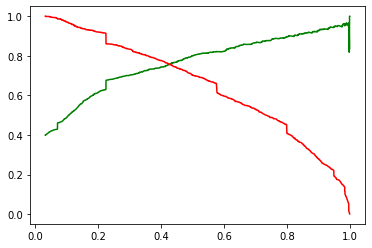

In [138]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :

- We checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered at
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 81% and 80% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be statistically stable and good.   